In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Enter 4 values for x1 (space-separated):")
x1 = list(map(float, input("x1: ").strip().split()))

print("Enter 4 values for x2 (space-separated):")
x2 = list(map(float, input("x2: ").strip().split()))

Enter 4 values for x1 (space-separated):
x1: 1 0 0 1
Enter 4 values for x2 (space-separated):
x2: .9 0 .3 .5


In [9]:
X = np.array([x1, x2])
labels = ['x1', 'x2']
print("\n📌 Original Data Matrix X:")
print(X)


📌 Original Data Matrix X:
[[1.  0.  0.  1. ]
 [0.9 0.  0.3 0.5]]


In [4]:
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
print("\n📉 Mean-Centered Data:")
print(X_centered)


📉 Mean-Centered Data:
[[ 0.05  0.   -0.15  0.25]
 [-0.05  0.    0.15 -0.25]]


In [5]:
cov_matrix = np.cov(X_centered, rowvar=False)
print("\n📊 Covariance Matrix:")
print(cov_matrix)


📊 Covariance Matrix:
[[ 0.005  0.    -0.015  0.025]
 [ 0.     0.     0.     0.   ]
 [-0.015  0.     0.045 -0.075]
 [ 0.025  0.    -0.075  0.125]]


In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\n🧮 Eigenvalues:")
print(eigenvalues)
print("\n🧭 Eigenvectors (columns):")
print(eigenvectors)


🧮 Eigenvalues:
[1.7500000e-01+0.0000000e+00j 1.2310174e-18+1.3732131e-18j
 1.2310174e-18-1.3732131e-18j 0.0000000e+00+0.0000000e+00j]

🧭 Eigenvectors (columns):
[[ 0.16903085+0.j          0.01471788-0.49787863j  0.01471788+0.49787863j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        -0.j
   1.        +0.j        ]
 [-0.50709255+0.j          0.73992741+0.j          0.73992741-0.j
   0.        +0.j        ]
 [ 0.84515425+0.j          0.44101287+0.09957573j  0.44101287-0.09957573j
   0.        +0.j        ]]


In [7]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

In [8]:
X_transformed = X_centered @ eigenvectors_sorted
print("\n📈 Transformed Data (PCA projection):")
print(X_transformed)


📈 Transformed Data (PCA projection):
[[ 2.95803989e-01+0.00000000e+00j -1.38777878e-17-1.73472348e-17j
  -1.38777878e-17+1.73472348e-17j  0.00000000e+00+0.00000000e+00j]
 [-2.95803989e-01+0.00000000e+00j  1.38777878e-17-3.81639165e-17j
   1.38777878e-17+3.81639165e-17j  0.00000000e+00+0.00000000e+00j]]


(np.float64(0.895),
 np.float64(1.005),
 np.float64(-0.05500000000000001),
 np.float64(0.05500000000000001))

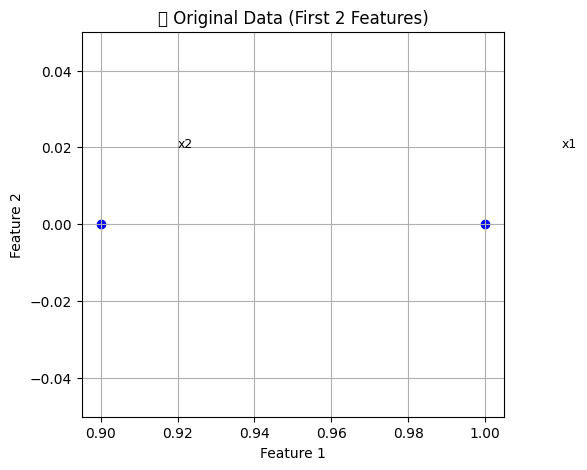

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
for i in range(len(X)):
    plt.text(X[i, 0]+0.02, X[i, 1]+0.02, labels[i], fontsize=9)
plt.title("📌 Original Data (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.axis('equal')

<ipython-input-13-78bc6accaef0>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


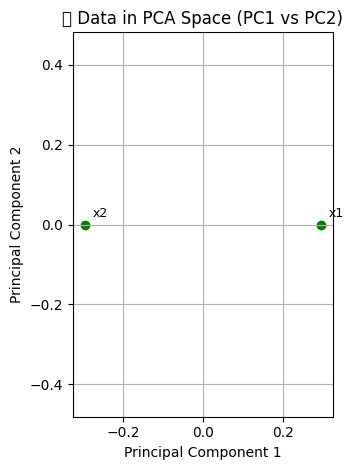

In [13]:
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color='green', label='PCA Projection')
for i in range(len(X_transformed)):
    plt.text(X_transformed[i, 0]+0.02, X_transformed[i, 1]+0.02, labels[i], fontsize=9)
plt.title("📈 Data in PCA Space (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()
